📁 Current Directory: c:\Users\HP\OneDrive\Documents\Edunet-Energy Internship\Project\Full\solar_energy\notebooks


C:\Users\HP\AppData\Local\Temp\ipykernel_3552\3404919176.py:37: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  weather['DATE_TIME'] = pd.to_datetime(weather['DATE_TIME'], dayfirst=True)


✅ Week 1 complete: Cleaned data saved to '../results/cleaned_data.csv'
✅ Data split into training and test sets
✅ Models trained successfully

📊 Model Accuracy Metrics:
🔹 DC Power:
   Mean Absolute Error  : 266.37
   Mean Squared Error   : 321488.48
   R² Score (Accuracy)  : 0.980  (98.01%)
🔹 AC Power:
   Mean Absolute Error  : 26.31
   Mean Squared Error   : 3081.63
   R² Score (Accuracy)  : 0.980  (98.00%)

✅ Week 2 complete: Model trained and accuracy checked


c:\Users\HP\OneDrive\Documents\Edunet-Energy Internship\Project\Full\solar_energy\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


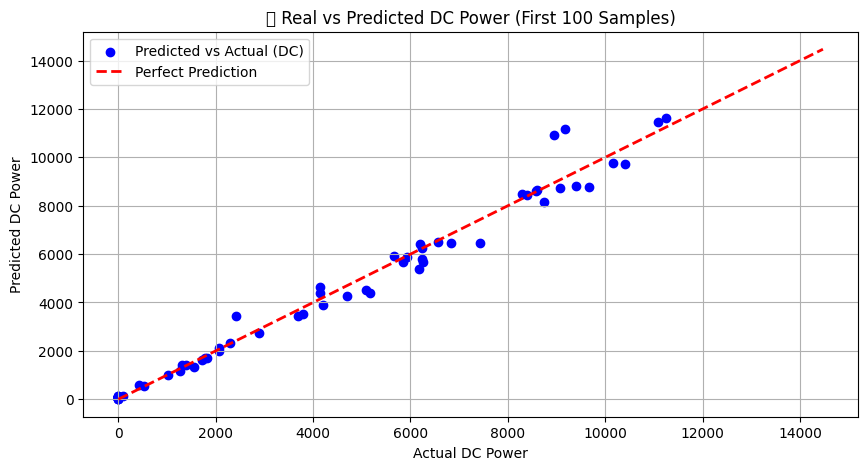

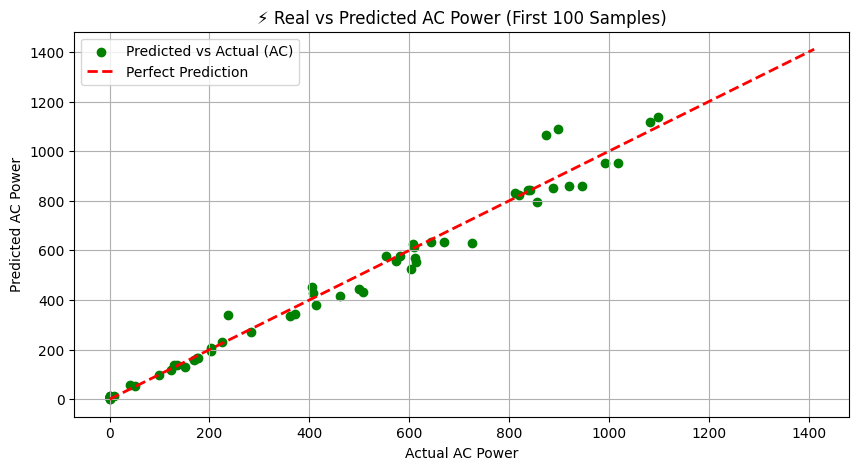


🔍 Sample Comparison (First 10 values):
     Actual DC  Predicted DC   Actual AC  Predicted AC
0  8937.875000  10919.576990  873.237500   1066.885282
1     0.000000    118.340125    0.000000     11.932795
2  6264.571429   5661.798238  613.785714    553.716373
3     0.000000     54.501005    0.000000      5.532775
4  1014.857143   1004.787545   98.628571     98.842510
5  9663.714286   8786.963327  945.028571    859.015396
6  6568.000000   6495.115841  643.385714    635.020548
7  1721.285714   1613.430851  168.700000    158.107916
8  3786.000000   3521.206103  372.071429    344.508290
9     0.000000     67.540043    0.000000      6.875445

✅ Visualization and evaluation done successfully!
✅ Linear Regression models saved successfully in '../models/' folder!


C:\Users\HP\AppData\Local\Temp\ipykernel_3552\3404919176.py:200: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_3552\3404919176.py:201: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  plt.savefig('../results/predictions_vs_actual_dc.png', dpi=300)


✅ Clean comparison plots saved in '../results/' folder!


In [5]:
# ==============================================================
#  🗓️ Week 1 to Week 2 : Solar Energy Prediction Project
# ==============================================================
#  Tasks covered:
#   ✅ Week 1 – Data cleaning and preprocessing
#   ✅ Week 2 – Splitting data, training model, accuracy check, and visualization
# ==============================================================

# -----------------------------
# Import libraries
# -----------------------------
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import os

# -----------------------------
# Confirm current working folder
# -----------------------------
print("📁 Current Directory:", os.getcwd())

# -----------------------------
# Load datasets
# -----------------------------
gen = pd.read_csv('../data/Plant_1_Generation_Data.csv')
weather = pd.read_csv('../data/Plant_1_Weather_Sensor_Data.csv')

# -----------------------------
# Convert date/time columns properly
# -----------------------------
gen['DATE_TIME'] = pd.to_datetime(gen['DATE_TIME'], dayfirst=True)
weather['DATE_TIME'] = pd.to_datetime(weather['DATE_TIME'], dayfirst=True)

# -----------------------------
# Merge datasets on DATE_TIME
# -----------------------------
data = pd.merge(gen, weather, on='DATE_TIME', how='inner')

# -----------------------------
# Drop unnecessary columns
# -----------------------------
drop_cols = ['PLANT_ID', 'SOURCE_KEY']
data.drop(columns=drop_cols, inplace=True, errors='ignore')

# -----------------------------
# Handle missing values (numeric only)
# -----------------------------
data.fillna(data.select_dtypes(include=[np.number]).mean(), inplace=True)

# -----------------------------
# Save cleaned dataset
# -----------------------------
os.makedirs('../results', exist_ok=True)
data.to_csv('../results/cleaned_data.csv', index=False)
print("✅ Week 1 complete: Cleaned data saved to '../results/cleaned_data.csv'")

# ==============================================================
# 🧠 WEEK 2: Train-Test Split, Model Training, Accuracy Check, Visualization
# ==============================================================

# -----------------------------
# Select features and target
# -----------------------------
X = data[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y_dc = data['DC_POWER']
y_ac = data['AC_POWER']  # Added for AC Power analysis

# -----------------------------
# Split the dataset
# -----------------------------
X_train, X_test, y_train_dc, y_test_dc = train_test_split(X, y_dc, test_size=0.2, random_state=42)
_, _, y_train_ac, y_test_ac = train_test_split(X, y_ac, test_size=0.2, random_state=42)
print("✅ Data split into training and test sets")

# -----------------------------
# Train Linear Regression models (for DC and AC power)
# -----------------------------
dc_model = LinearRegression()
ac_model = LinearRegression()

dc_model.fit(X_train, y_train_dc)
ac_model.fit(X_train, y_train_ac)
print("✅ Models trained successfully")

# -----------------------------
# Make predictions
# -----------------------------
y_pred_dc = dc_model.predict(X_test)
y_pred_ac = ac_model.predict(X_test)

# -----------------------------
# Evaluate model accuracy
# -----------------------------
mae_dc = mean_absolute_error(y_test_dc, y_pred_dc)
mse_dc = mean_squared_error(y_test_dc, y_pred_dc)
r2_dc = r2_score(y_test_dc, y_pred_dc)

mae_ac = mean_absolute_error(y_test_ac, y_pred_ac)
mse_ac = mean_squared_error(y_test_ac, y_pred_ac)
r2_ac = r2_score(y_test_ac, y_pred_ac)

print("\n📊 Model Accuracy Metrics:")
print("🔹 DC Power:")
print(f"   Mean Absolute Error  : {mae_dc:.2f}")
print(f"   Mean Squared Error   : {mse_dc:.2f}")
print(f"   R² Score (Accuracy)  : {r2_dc:.3f}  ({r2_dc * 100:.2f}%)")

print("🔹 AC Power:")
print(f"   Mean Absolute Error  : {mae_ac:.2f}")
print(f"   Mean Squared Error   : {mse_ac:.2f}")
print(f"   R² Score (Accuracy)  : {r2_ac:.3f}  ({r2_ac * 100:.2f}%)")

print("\n✅ Week 2 complete: Model trained and accuracy checked")

# ==============================================================
# 📈 Visualization – Real vs Predicted Comparison (DC + AC)
# ==============================================================

# -----------------------------
# Plot DC Power comparison
# -----------------------------
plt.figure(figsize=(10,5))
plt.scatter(y_test_dc[:100], y_pred_dc[:100], color='blue', label='Predicted vs Actual (DC)')
plt.plot([y_test_dc.min(), y_test_dc.max()], [y_test_dc.min(), y_test_dc.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('🔋 Real vs Predicted DC Power (First 100 Samples)')
plt.xlabel('Actual DC Power')
plt.ylabel('Predicted DC Power')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Plot AC Power comparison
# -----------------------------
plt.figure(figsize=(10,5))
plt.scatter(y_test_ac[:100], y_pred_ac[:100], color='green', label='Predicted vs Actual (AC)')
plt.plot([y_test_ac.min(), y_test_ac.max()], [y_test_ac.min(), y_test_ac.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('⚡ Real vs Predicted AC Power (First 100 Samples)')
plt.xlabel('Actual AC Power')
plt.ylabel('Predicted AC Power')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Display small result table (sample)
# -----------------------------
result_df = pd.DataFrame({
    'Actual DC': y_test_dc[:10].values,
    'Predicted DC': y_pred_dc[:10],
    'Actual AC': y_test_ac[:10].values,
    'Predicted AC': y_pred_ac[:10]
})
print("\n🔍 Sample Comparison (First 10 values):")
print(result_df)

print("\n✅ Visualization and evaluation done successfully!")

# ==============================================================
# 💾 Save trained Linear Regression models
# ==============================================================

# Create 'models' folder if not exists
os.makedirs('../models', exist_ok=True)

# Save both DC and AC power prediction models
joblib.dump(dc_model, '../models/dc_power_model.pkl')
joblib.dump(ac_model, '../models/ac_power_model.pkl')

print("✅ Linear Regression models saved successfully in '../models/' folder!")



# ==============================================================
# 📸 SAVE CLEAN VISUALIZATIONS TO 'results' FOLDER
# ==============================================================

import matplotlib.pyplot as plt
import os

# Ensure folder exists
os.makedirs('../results', exist_ok=True)

# ---- Clean DC Power Plot ----
plt.figure(figsize=(10,5))
plt.scatter(y_test_dc[:100], y_pred_dc[:100], color='blue', label='Predicted vs Actual (DC)')
plt.plot([y_test_dc.min(), y_test_dc.max()],
         [y_test_dc.min(), y_test_dc.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.title('🔋 Real vs Predicted DC Power (First 100 Samples)')
plt.xlabel('Actual DC Power')
plt.ylabel('Predicted DC Power')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../results/predictions_vs_actual_dc.png', dpi=300)
plt.close()

# ---- Clean AC Power Plot ----
plt.figure(figsize=(10,5))
plt.scatter(y_test_ac[:100], y_pred_ac[:100], color='green', label='Predicted vs Actual (AC)')
plt.plot([y_test_ac.min(), y_test_ac.max()],
         [y_test_ac.min(), y_test_ac.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.title('⚡ Real vs Predicted AC Power (First 100 Samples)')
plt.xlabel('Actual AC Power')
plt.ylabel('Predicted AC Power')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../results/predictions_vs_actual_ac.png', dpi=300)
plt.close()

print("✅ Clean comparison plots saved in '../results/' folder!")
